In [1]:
#importing the required libraries

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
#user controlled variables

p_rew = 1 #probability of rewiring in the watts-strogatz network
nn = 2 #each node is connected to nn number of nearest neighbours, nn-1 neighbors if nn is odd


start = 1 #initial condition : fraction of infected individuals

p = 1  #probability of dose transfer upon interaction
rho = 1   #probability of becoming susceptible after recovery
r = 1    #probability of recovery when dose level drops below threshold

N = 100   #number of individuals
T = 1000  #number of time steps

mem_time_steps = 12 #the number of previous time steps which the individual remembers about 

d_star = 3*np.ones((N,1),dtype=np.int32)
print('d_star')
# print(d_star)
print(type(d_star))
print(d_star.shape)

d_star
<class 'numpy.ndarray'>
(100, 1)


In [3]:
#initialising variables and arrays to store information

kount = 0

phi_star = 999*np.ones([11,2]) #fraction of steady state infected
print('phi_star')
# print(phi_star)
print(phi_star.shape)

phi = 999*np.ones([1,T]) #fraction of steady state infected
print('phi')
# print(phi)
print(phi.shape)

t = np.arange(0,T) #time steps
t = np.asarray(t).reshape(1,T)
print('t')
# print(t)
print(t.shape)
print(type(t))

partner = 999*np.ones((N,T),dtype=np.int32) #partners used to form pairs in every time step
partner = np.asarray(partner)
print('partner')
print(partner.shape)
print(type(partner))
indi_state = np.zeros((N,T),dtype=np.int32) #stores the state of eahc individual
indi_state[:,0] = 1
print('indi_state')
# print(indi_state)
print(type(indi_state))

d_ini = np.zeros((N,mem_time_steps))
print('d_ini')
print(type(d_ini))
print(d_ini.shape)
# print(d_ini)
d = 999*np.ones((N,T)) #doses
print('d')
# print(d)
print(type(d))
D = 999*np.ones((N,T)) #cumulative doses
print('D')
# print(D)
print(type(D))

z1 = 2*np.ones((N,T)) #stores the random numbers for deciding the dose transfer
z2 = 2*np.ones((N,T)) #stores the random numbers for deciding resusceptibility upon recovery
z3 = 2*np.ones((N,T)) #stores the random numbers for deciding immunity upon recovery
print('z1')
# print(z1)
print(type(z1))

phi_star
(11, 2)
phi
(1, 1000)
t
(1, 1000)
<class 'numpy.ndarray'>
partner
(100, 1000)
<class 'numpy.ndarray'>
indi_state
<class 'numpy.ndarray'>
d_ini
<class 'numpy.ndarray'>
(100, 12)
d
<class 'numpy.ndarray'>
D
<class 'numpy.ndarray'>
z1
<class 'numpy.ndarray'>


In [4]:
#initial state of individuals
#randomly grouping into i, s or r

infec = random.sample(range(0, N), np.int32(start*N)) #radnomly infecting few individuals as initial condition
# np.random.shuffle(infec)
infec = np.asarray(infec).reshape(np.int32(start*N),1)
if start != 0 :
    indi_state[infec[:,0],0] = 2
print('infec')
print(type(infec))
# print(infec)
print('indi_state')
# print(indi_state)

phi[0,0] = np.count_nonzero(indi_state[:,0] == 2)/N
print('phi')
# print(phi)

infec
<class 'numpy.ndarray'>
indi_state
phi


In [5]:
#implementing marc's initial condition
I = np.where(indi_state[:,0]==2)
I = np.transpose(np.asarray(I))
print('I')
print(type(I))
print(I.shape)
# print(I)

if len(I) != 0 :
    for i in range(0,len(I)) : 
        d_ini[I[i],0:] = p
else :
    d_ini[:,0:] = 0

print('d_ini')
# print(d_ini)

I
<class 'numpy.ndarray'>
(100, 1)
d_ini


node_array
(100, 1)
<class 'numpy.ndarray'>
adjacency matrix
(100, 100)
<class 'scipy.sparse.csr.csr_matrix'>


/home/aiyappa/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


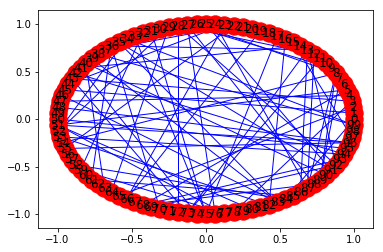

In [6]:
#creating the static Watts-Strogatz network

G = nx.watts_strogatz_graph(N,nn,p_rew) #no rewiring for now

# #relabelling the nodes to start with 1
# G = nx.convert_node_labels_to_integers(G,first_label=1,ordering='default',label_attribute=None)

#getting the nodes as a list
node_list = [G.nodes]

#and converting it into an array(column vector)

node_array = np.asarray(node_list).reshape(N,1)
print('node_array')
# print(node_array)
print(node_array.shape)
print(type(node_array))

#obtaining the edges via the adjancency matrix
adj_mat = nx.adjacency_matrix(G)
print('adjacency matrix')
print(adj_mat.shape)
print(type(adj_mat))
# print(adj_mat)

nx.draw_networkx(G,pos=nx.circular_layout(G),with_labels=True,nodecolor='r',edge_color='b')

In [7]:
kount = 0
# val = np.int32(N/2)
for k in range(1,T): #loop for time
#     print('k = ',k)
    
    for n in range(0,N): #loop for nodes
#         print('n = ',n)
        partner[n,k] = np.random.randint(0,N)
#         print(partner[n,k])
        z1[n,k] = np.random.uniform()
        
        #if one is infected and the other is susceptible and they are connected 
        if (adj_mat[n,partner[n,k]] == 1) and (indi_state[n,k-1] == 1) and (indi_state[partner[n,k],k-1] == 2) :
            if p >= z1[n,k] :
#                 print('postive dose to the one')
                d[n,k] = 1 #the one receives constant dose
                d[partner[n,k],k] = 0 #the other receives no dose
            else :
#                 'interaction but no dose'
                d[n,k] = 0
                d[partner[n,k],k] = 0
        #if both are infected and they are connected
        elif (adj_mat[n,partner[n,k]] == 1) and (indi_state[n,k-1] == 2) and (indi_state[partner[n,k],k-1] == 2) :
            if p >= z1[n,k] :
#                 'postive dose for both'
                d[n,k] = 1 #the other receives constant dose
                d[partner[n,k],k] = 0 #the one STILL receives NO DOSE
            else :
#                 'interaction but no dose'
                d[n,k] = 0
                d[partner[n,k],k] = 0
        else :
#             'no interaction at all'
                d[n,k] = 0
                d[partner[n,k],k] = 0
        
        
#     updating cumulative dose
    D[:,k] = 0
    m = k - (mem_time_steps)
    if m > 0 :
        D[:,k] = np.sum(d[:,m:k+1:1],1)
    if m <= 0 :
        while m <= 0 :
            m = m + 1
    D[:,k] = np.sum(d[:,m:k+1:1],1) + np.sum(d_ini[:,1:((mem_time_steps-(k-m)))+1:1],1)
    
    for n in range(0,N):
#         print(n)
#         print(k)
#         if threshold is met and is susceptible
        if (D[n,k] >= d_star[n,0]) and (indi_state[n,k-1] == 1) :
#             'above thresh becomes infected'
            indi_state[n,k] = 2 #susceptible becomes infected
        elif (D[n,k] < d_star[n,0]) and (indi_state[n,k-1] == 2) :
#         recovery : if drops bel threshold and is infected
            z2[n,k] = np.random.uniform()
            if r >= z2[n,k] :
#                 'below thresh'
                z3[n,k] = np.random.uniform()
                if rho >= z3[n,k] :
#                     'below thresh becomes susceptible'
                    indi_state[n,k] = 1
                else :
#                     'below thresh becomes immune'
                    indi_state[n,k] = 3
            else :
#                 'below thresh stays infected'
                indi_state[n,k] = 2
        else :
#             'retains previous state'
            indi_state[n,k] = indi_state[n,k-1]
    
    phi[0,k] = np.count_nonzero(indi_state[:,k] == 2)/N
#     kount = kount + 1


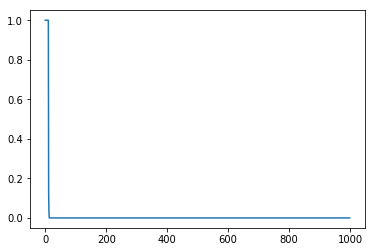

In [8]:
#printing out the necessary variables
# print(d)
# print(D)
# print(z1)
# print(phi)

plt.plot(t[0,:],phi[0,:])
plt.show()